In [2]:
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn import tree
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_combined = pd.read_csv("../CombinedBooksRandomized.csv")
df_combined.head()

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres
0,The Left Hand of Darkness (Paperback),Ursula K. Le Guin,4.07,1258005,85585,753,1969,4.09,155037,"Science Fiction,Fiction,Fantasy,Classics,Scien..."
1,Wish You Were Here (Hardcover),Jodi Picoult,3.99,4447186,273761,82,2021,3.99,153115,"Fiction,Contemporary,Audiobook,Romance,Adult,A..."
2,If I Had Your Face (Hardcover),Frances Cha,3.76,41079,5356,4,2020,3.76,41078,"Fiction,Contemporary,Literary Fiction,Adult,Fe..."
3,I'll Be Gone in the Dark: One Woman's Obsessiv...,Michelle McNamara,4.12,210117,18190,2,2018,4.12,210038,"Nonfiction,Crime,Audiobook,Mystery,Mystery,His..."
4,1984 (Paperback),George Orwell,4.10,8007938,201434,729,1949,4.19,4034352,"Classics,Fiction,Science Fiction,Science Ficti..."


In [4]:
minRaters=min(df_combined.Raters)
maxRaters=max(df_combined.Raters)
meanRaters=df_combined.Raters.mean()
print('Min Raters :',minRaters)
print('Max Raters :',maxRaters)
print('Mean Raters :',meanRaters)

Min Raters : 41
Max Raters : 8958054
Mean Raters : 316506.9895833333


In [5]:
#rating class column
conditions  = [ df_combined.Rating >= 4, (df_combined.Rating < 4) & (df_combined.Rating> 2), (df_combined.Rating <= 2) ]
choices     = [ "good", 'mediocre', 'bad' ]
df_combined["rating_class"] = np.select(conditions, choices, default="bad")
#rater class column
conditions  = [ df_combined.Raters >= 25000, (df_combined.Raters < 25000) & (df_combined.Raters> 1000), (df_combined.Raters <= 1000) ]
choices     = [ "large", 'medium', 'small' ]
df_combined["raters_class"] = np.select(conditions, choices, default="small")

df_combined['worth_reading']=np.where(((df_combined.rating_class == "mediocre") & (df_combined.raters_class == "large"))|((df_combined.rating_class == "good") & ((df_combined['raters_class'] == "large")|(df_combined["raters_class"] =="medium"))) ,'yes','no')

In [6]:
df_combined.head()

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres,rating_class,raters_class,worth_reading
0,The Left Hand of Darkness (Paperback),Ursula K. Le Guin,4.07,1258005,85585,753,1969,4.09,155037,"Science Fiction,Fiction,Fantasy,Classics,Scien...",good,large,yes
1,Wish You Were Here (Hardcover),Jodi Picoult,3.99,4447186,273761,82,2021,3.99,153115,"Fiction,Contemporary,Audiobook,Romance,Adult,A...",mediocre,large,yes
2,If I Had Your Face (Hardcover),Frances Cha,3.76,41079,5356,4,2020,3.76,41078,"Fiction,Contemporary,Literary Fiction,Adult,Fe...",mediocre,large,yes
3,I'll Be Gone in the Dark: One Woman's Obsessiv...,Michelle McNamara,4.12,210117,18190,2,2018,4.12,210038,"Nonfiction,Crime,Audiobook,Mystery,Mystery,His...",good,large,yes
4,1984 (Paperback),George Orwell,4.10,8007938,201434,729,1949,4.19,4034352,"Classics,Fiction,Science Fiction,Science Ficti...",good,large,yes


In [7]:
#split dataset in features and target variable
feature_cols=["Author Average Rating", "Author Votes", "Review Count", "Distinct Works", "Year"]
X = df_combined[feature_cols] # Features
y = df_combined['worth_reading'] # Target variable

print(X)
print(y)

      Author Average Rating  Author Votes  Review Count  Distinct Works  Year
0                      4.07       1258005         85585             753  1969
1                      3.99       4447186        273761              82  2021
2                      3.76         41079          5356               4  2020
3                      4.12        210117         18190               2  2018
4                      4.10       8007938        201434             729  1949
...                     ...           ...           ...             ...   ...
1723                   4.23        353862         48530              14  2017
1724                   3.87         15137          1503              60  2012
1725                   3.88       1385551        106047              51  2011
1726                   4.28        448442         25874              15  1943
1727                   3.58          6388           851               7  2005

[1728 rows x 5 columns]
0       yes
1       yes
2       yes
3  

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()




In [10]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))
parameter_grid = dict(n_neighbors=k_range)

grid_search = GridSearchCV(estimator=knn_model, cv = 3, param_grid= parameter_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [11]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002536,7.532018e-04,0.008660,9.426380e-04,1,{'n_neighbors': 1},0.868486,0.888337,0.905707,0.887510,0.015207,29
1,0.001986,1.180754e-05,0.007667,4.928173e-04,2,{'n_neighbors': 2},0.813896,0.846154,0.858561,0.839537,0.018825,30
2,0.002006,1.311134e-05,0.006668,4.712035e-04,3,{'n_neighbors': 3},0.898263,0.890819,0.918114,0.902399,0.011521,27
3,0.001661,4.682334e-04,0.008333,1.881773e-03,4,{'n_neighbors': 4},0.895782,0.880893,0.900744,0.892473,0.008435,28
4,0.001999,9.199649e-07,0.007334,4.724389e-04,5,{'n_neighbors': 5},0.923077,0.903226,0.925558,0.917287,0.009994,12
5,0.001997,3.573629e-06,0.007669,4.753862e-04,6,{'n_neighbors': 6},0.913151,0.890819,0.923077,0.909016,0.013490,26
6,0.002001,1.520405e-06,0.007998,2.727668e-06,7,{'n_neighbors': 7},0.913151,0.905707,0.920596,0.913151,0.006078,24
7,0.002337,4.735060e-04,0.007997,1.083865e-06,8,{'n_neighbors': 8},0.915633,0.900744,0.920596,0.912324,0.008435,25
8,0.002333,4.687860e-04,0.007665,4.709814e-04,9,{'n_neighbors': 9},0.913151,0.900744,0.928040,0.913978,0.011159,23
9,0.002001,3.294052e-06,0.007678,4.595148e-04,10,{'n_neighbors': 10},0.920596,0.898263,0.933002,0.917287,0.014374,12


In [12]:
final_model = grid_search.best_params_
final_model

{'n_neighbors': 15}

From the best parameters found through the gridsearch, we tweak some more parameters to avoid overfitting.

In [13]:
knn_class = KNeighborsClassifier(n_neighbors= 15)
knn_class.fit(X_train, y_train)
predictions = knn_class.predict(X_test)
predictions

from sklearn.metrics import accuracy_score, confusion_matrix

print("Trained acc: ", accuracy_score(y_train, knn_class.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Confusion matrix train: ", "\n", confusion_matrix(y_train, knn_class.predict(X_train)))
print("Confusion matrix test: ", "\n",confusion_matrix(y_test, predictions))


Trained acc:  0.9263854425144747
Test accuracy: 0.928709055876686
Confusion matrix train:  
 [[276  77]
 [ 12 844]]
Confusion matrix test:  
 [[144  28]
 [  9 338]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_train, knn_class.predict(X_train)))
print("---------------------------------------------------------")
print(classification_report(y_test, predictions))

NameError: name 'forest_class' is not defined

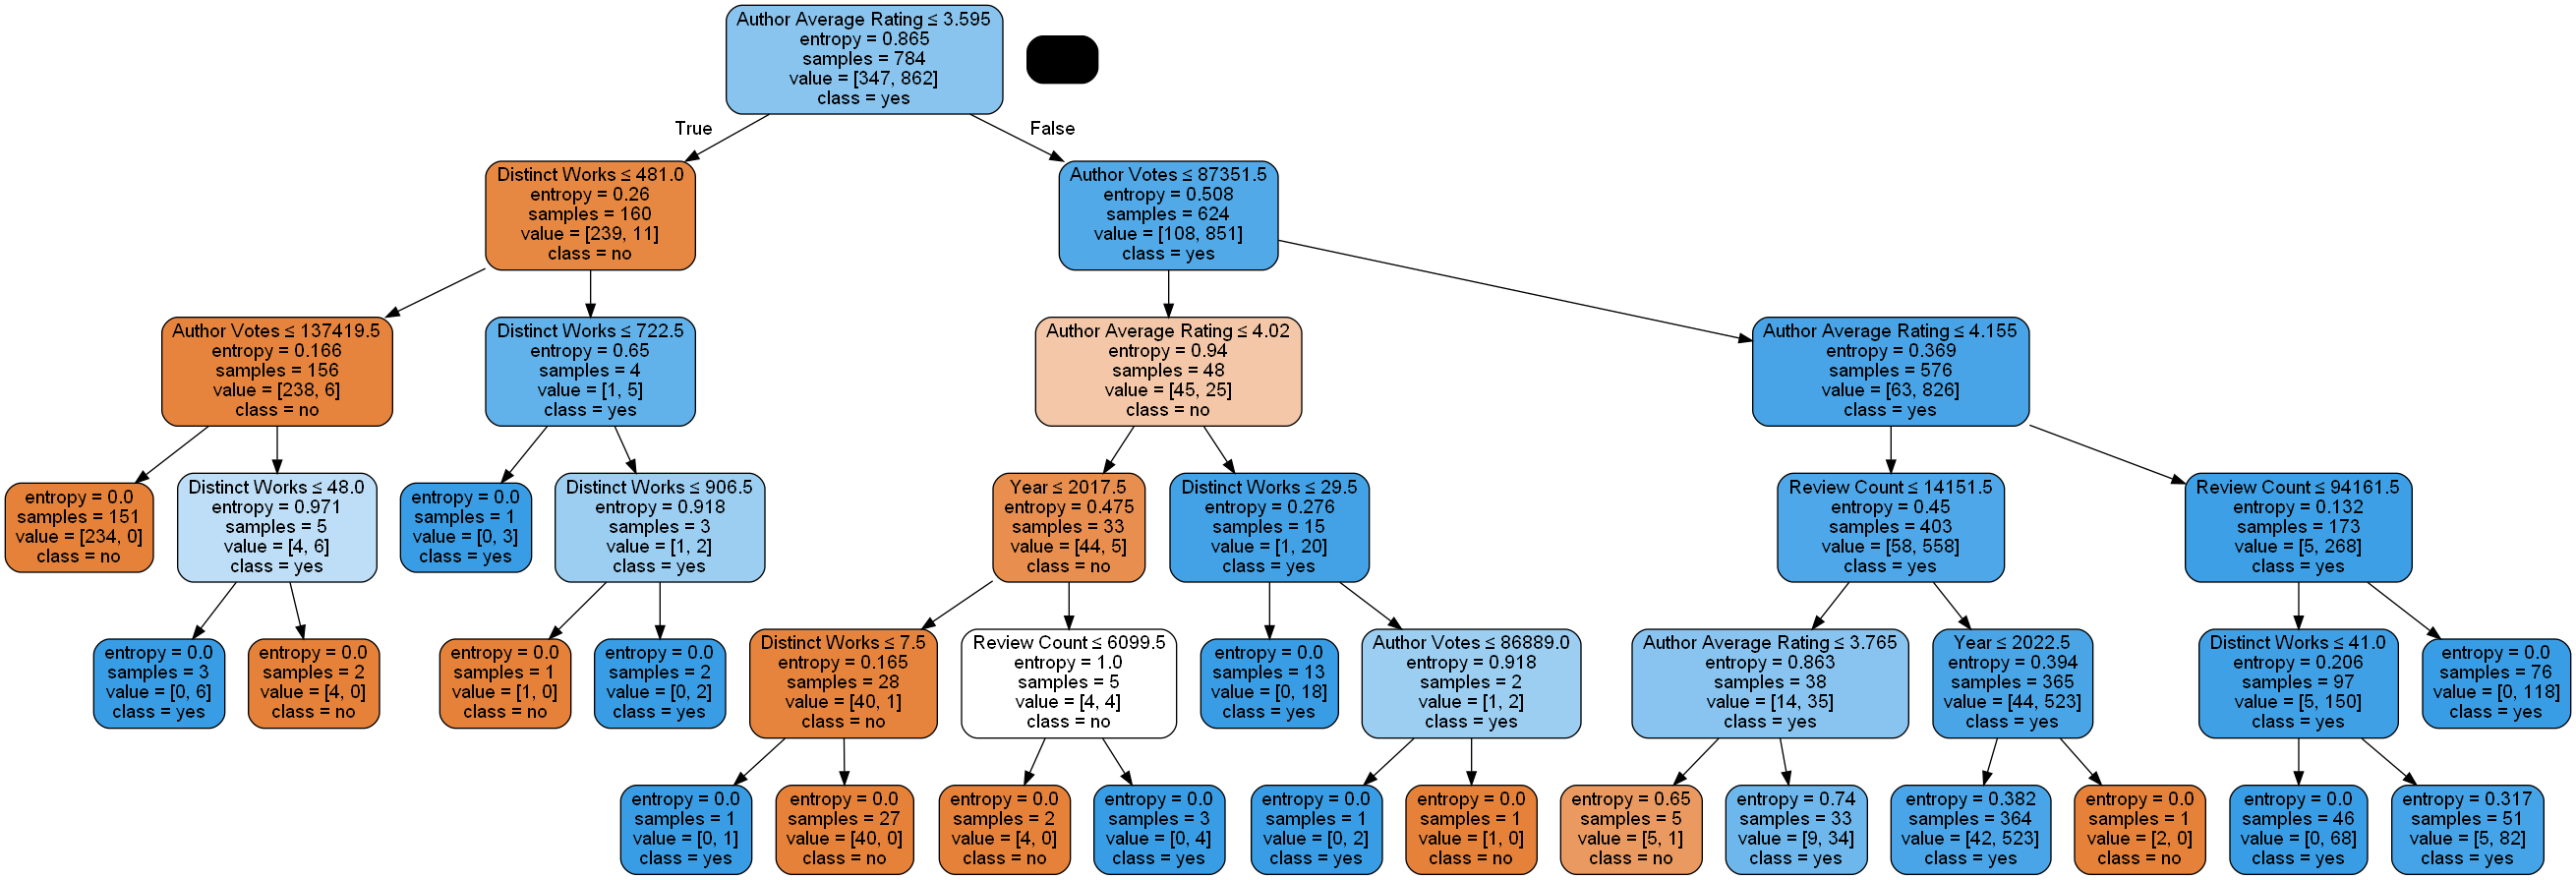

In [ ]:
# estimator = forest_class.estimators_[5]

# dot_data = StringIO()
# export_graphviz(estimator, out_file=dot_data, 
#                      feature_names=X.columns,  
#                      class_names=["no", "yes"],  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('combined_rf.png')
# Image(graph.create_png())